In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st


df_450 = pd.read_csv('450.csv', sep=',',header=None)
df_800 = pd.read_csv('800.csv', sep=',',header=None)
df_1800 = pd.read_csv('1800.csv', sep=',',header=None)
df_2600 = pd.read_csv('2600.csv', sep=',',header=None)

avrg_cell_throughput_450 = df_450.values[0]
avrg_cell_throughput_800 = df_800.values[0]
avrg_cell_throughput_1800 = df_1800.values[0]
avrg_cell_throughput_2600 = df_2600.values[0]

linspace = np.linspace(0,100,100)

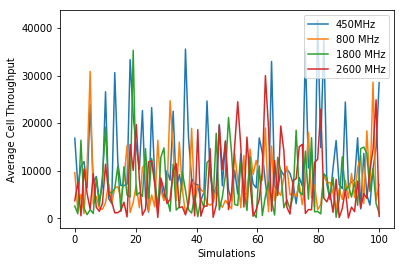

In [210]:
plt.plot(linspace, avrg_cell_throughput_450, label='450MHz')
plt.plot(linspace, avrg_cell_throughput_800, label='800 MHz')
plt.plot(linspace, avrg_cell_throughput_1800, label='1800 MHz')
plt.plot(linspace, avrg_cell_throughput_2600, label='2600 MHz')

plt.xlabel('Simulations')
plt.ylabel('Average Cell Throughput')

plt.legend()
plt.show()

### Plotting the different histogramms

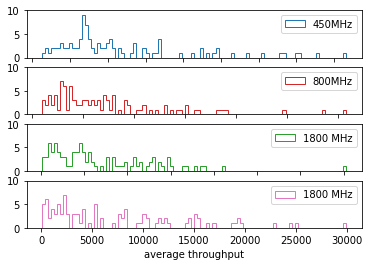

In [211]:
fig=plt.figure()
ax1 = plt.subplot(411)
ax2 = plt.subplot(412)
ax3 = plt.subplot(413)
ax4 = plt.subplot(414)

ax1.hist(avrg_cell_throughput_450, bins=100, histtype='step', color='tab:blue', label='450MHz')
ax2.hist(avrg_cell_throughput_800, bins=100, histtype='step', color='tab:red', label='800MHz')
ax3.hist(avrg_cell_throughput_1800, bins=100, histtype='step', color='tab:green',label='1800 MHz')
ax4.hist(avrg_cell_throughput_2600, bins=100, histtype='step', color='tab:pink',label='1800 MHz')

ax1.set_ylim(top=10)
ax2.set_ylim(top=10)
ax3.set_ylim(top=10)
ax4.set_ylim(top=10)

ax1.get_shared_x_axes().join(ax1, ax2)

ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

plt.xlabel('average throughput')


plt.show()

In [212]:
mean_450 = avrg_cell_throughput_450.mean()
mean_800 = avrg_cell_throughput_800.mean()
mean_1800 = avrg_cell_throughput_1800.mean()
mean_2600 = avrg_cell_throughput_2600.mean()

Calculating the confidence interval

In [228]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return h, m-h, m+h

In [235]:
confidence_450 = mean_confidence_interval(avrg_cell_throughput_450)
confidence_800 = mean_confidence_interval(avrg_cell_throughput_800)
confidence_1800 = mean_confidence_interval(avrg_cell_throughput_1800)
confidence_2600 = mean_confidence_interval(avrg_cell_throughput_2600)

### 450 Mhz

In [243]:
print("Conf Range:", confidence_450[0])
print("Lower:", confidence_450[1])
print("Upper:", confidence_450[2])

Conf Range: 1762.1903687309423
Lower: 9842.756068693945
Upper: 13367.13680615583


### 800 MHz

In [244]:
print("Conf Range:", confidence_800[0])
print("Lower:", confidence_800[1])
print("Upper:", confidence_800[2])

Conf Range: 1152.524013169359
Lower: 6115.137217241589
Upper: 8420.185243580307


### 1800 MHz

In [246]:
print("Conf Range:", confidence_1800[0])
print("Lower:", confidence_1800[1])
print("Upper:", confidence_1800[2])

Conf Range: 1173.3162728182226
Lower: 5713.016079855225
Upper: 8059.64862549167


## 2600 MHz

In [247]:
print("Conf Range:", confidence_2600[0])
print("Lower:", confidence_2600[1])
print("Upper:", confidence_2600[2])

Conf Range: 1331.0805995675776
Lower: 5866.825087379191
Upper: 8528.986286514346


In [232]:
# Create lists for the plot
frequencies = ['450 MHz', '800 MHz', '1800 MHz', '2600 MHz']
x_pos = np.arange(len(frequencies))
Bars = [mean_450, mean_800, mean_1800, mean_2600]
confidence = [confidence_450[0], confidence_800[0], confidence_1800[0], confidence_2600[0]]

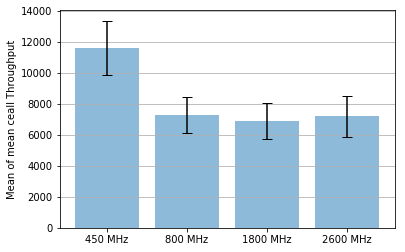

In [233]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, Bars, yerr=confidence, align='center', alpha=0.5, ecolor='black', capsize=5)
ax.set_ylabel('Mean of mean ceall Throughput')
ax.set_xticks(x_pos)
ax.set_xticklabels(frequencies)
ax.yaxis.grid(True)

plt.show()

## ToDo

(-1.959963984540054, 1.959963984540054)


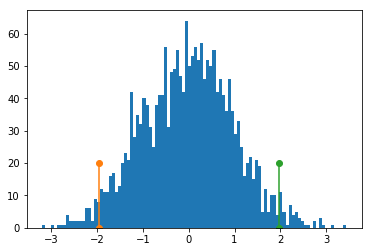

In [223]:
s = np.random.normal(0,1,2000)

plt.figure()
_ = plt.hist(s,  bins=100)

sigma =1
mean = 0
ci = scipy.stats.norm.interval(0.95, loc=mean, scale=sigma)
print(ci)

# confidence interval left line
one_x12, one_y12 = [ci[0],ci[0]], [0, 20]
# confidence interval right line
two_x12, two_y12 = [ci[1],ci[1]], [0, 20]

plt.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o')
plt.show()